<a href="https://colab.research.google.com/github/Lord8Bits/Math-Algorithm-Visualizer/blob/main/timing_sorting_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

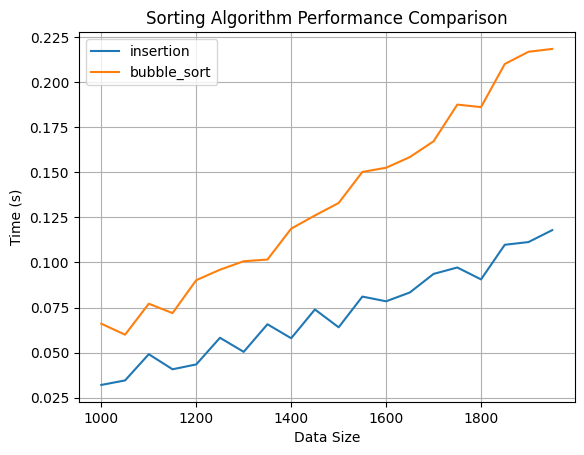

In [5]:
import matplotlib.pyplot as plt
import random
import timeit

"""
Module: time_measure

This module provides a TimeMeasure class for benchmarking and comparing the runtime
of different sorting algorithms across varying data sizes. The results are displayed
using matplotlib.
"""

class TimeMeasure:
    def __init__(self, new_function: list, sizes: list):
        """
        Initialize a TimeMeasure instance.

        Args:
            new_function (list): List of sorting functions (callables) to measure.
            sizes (list of int): List of data sizes (lengths) for random test lists.
        """
        self.functions = new_function
        self.data = {}
        for size in sizes:
            self.data.update({size : self.randomTuple(size)})

    def randomTuple(self, size: int) -> tuple:
        return tuple(self.randomData(size))

    def randomData(self, size: int) -> list:
        """
        Generate a list of random integers for benchmarking.

        Args:
            size (int): The length of the list to generate.

        Returns:
            list: A list of random integers between 1 and 1000.
        """
        return [random.randint(1, 1000) for _ in range(size)]

    def measure_time(self, func: callable, repeat=100, number=100) -> list:
        """
        Measures average runtime of a sorting function over multiple repeats.

        This method uses timeit.repeat to run the provided function on fresh
        randomly-generated data for each size, averages the runtimes, and collects
        the results.

        Args:
            func: The sorting function to benchmark. It should accept
                  a list as its sole argument.

        Returns:
            list of float: Average runtimes (in seconds) for each data size.
        """
        measured_time = []
        for data in self.data.values():
            # DONT Build a unique random list in the setup for each measurement
            stmt = f"{func.__name__}(data)"
            setup = (
                "from __main__ import " + func.__name__ + "\n"
                + f"data = {list(data)}"
            )
            # Repeat the measurement to reduce noise
            times = timeit.repeat(
                stmt,
                setup=setup,
                repeat=repeat,
                number=number
            )
            avg = sum(times) / repeat
            measured_time.append(avg)
        return measured_time

    def plot(self) -> None:
        """
        Plot shows the results of all registered sorting functions.

        This method calls measure_time() for each function, then generates a
        line plot of data size vs. average runtime. A legend is added to distinguish
        between algorithms.
        """
        for func in self.functions:
            measured_time = self.measure_time(func)
            plt.plot(list(self.data.keys()), measured_time, label=func.__name__)

        plt.legend()
        plt.xlabel("Data Size")
        plt.ylabel("Time (s)")
        plt.title("Sorting Algorithm Performance Comparison")
        plt.grid(True)
        plt.show()


def bubble_sort(L: list) -> list:
    limit = len(L)
    for i in range(limit):
        swapped = False
        for j in range(limit - i - 1):
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
                swapped = True
        if not swapped:
            break
    return L


def insertion(L: list) -> list:
    for i in range(1, len(L)):
        key = L[i]
        j = i - 1
        # Shift elements of the sorted segment that are greater than key
        while j >= 0 and L[j] > key:
            L[j+1] = L[j]
            j -= 1
        # Insert the key at its correct position
        L[j+1] = key
    return L


sort_time = TimeMeasure([insertion, bubble_sort], [1000 + i*50 for i in range(20)])
sort_time.plot()
#credit to Phillyclause89 for contributing to this code